<a href="https://colab.research.google.com/github/Mona1811k/Credit_card_default_prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install opendatasets
!pip install pandas
!pip install Kaggle
import pandas as pd
import zipfile
import os
os.environ['KAGGLE_USERNAME'] = "nagalakshmikoppada"
os.environ['KAGGLE_KEY'] ="b58b3c472abef067d4e4bd7ccf4339ea"
kaggle_dir = '/root/.kaggle'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
!echo '{"username":"nagalakshmikoppada","key":"b58b3c472abef067d4e4bd7ccf4339ea"}' > /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

default-of-credit-card-clients-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
import zipfile

zip_path = '/content/default-of-credit-card-clients-dataset.zip'
extract_path = '/content/extract'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("/content/extract/UCI_Credit_Card.csv")

In [30]:
df['IsDefaulter'] =df ['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='IsDefaulter', ylabel='count'>

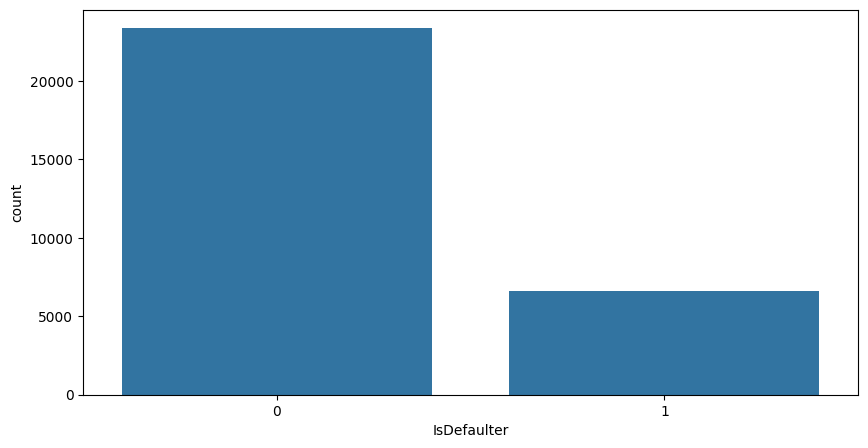

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [33]:
columns_to_drop = ['PAY_0','PAY_2','PAY_3','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']

In [34]:
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [35]:
# Check the resulting DataFrame
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_4  PAY_5  PAY_6  \
0   1    20000.0    2          2         1   24     -1     -2     -2   
1   2   120000.0    2          2         2   26      0      0      2   
2   3    90000.0    2          2         2   34      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0   
4   5    50000.0    1          2         1   57      0      0      0   

   BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0        0.0        0.0       0.0       0.0       0.0   
1     3272.0     3455.0     3261.0    1000.0       0.0    2000.0   
2    14331.0    14948.0    15549.0    1000.0    1000.0    5000.0   
3    28314.0    28959.0    29547.0    1100.0    1069.0    1000.0   
4    20940.0    19146.0    19131.0    9000.0     689.0     679.0   

   default.payment.next.month  IsDefaulter  
0                           1            1  
1                           1            1  
2                      

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_4                       30000 non-null  int64  
 7   PAY_5                       30000 non-null  int64  
 8   PAY_6                       30000 non-null  int64  
 9   BILL_AMT4                   30000 non-null  float64
 10  BILL_AMT5                   30000 non-null  float64
 11  BILL_AMT6                   30000 non-null  float64
 12  PAY_AMT4                    30000 non-null  float64
 13  PAY_AMT5                    300

In [38]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [39]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [40]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<ipython-input-40-dbc3559d67ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Defaulter'] = df['IsDefaulter']
<ipython-input-40-dbc3559d67ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 1000x500 with 0 Axes>

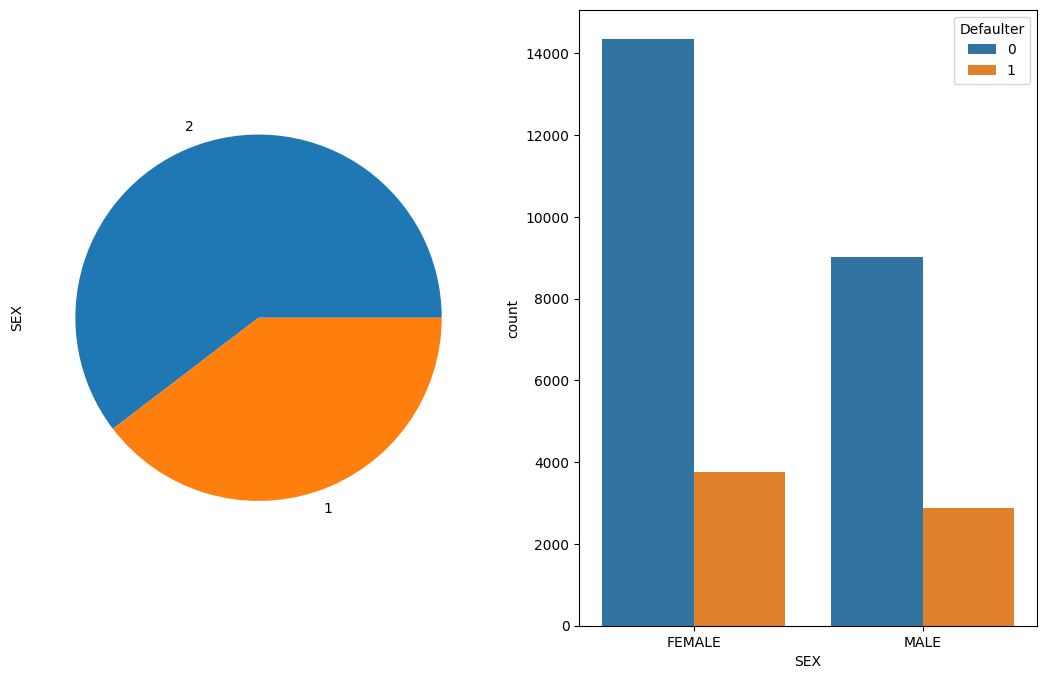

<Figure size 1000x500 with 0 Axes>

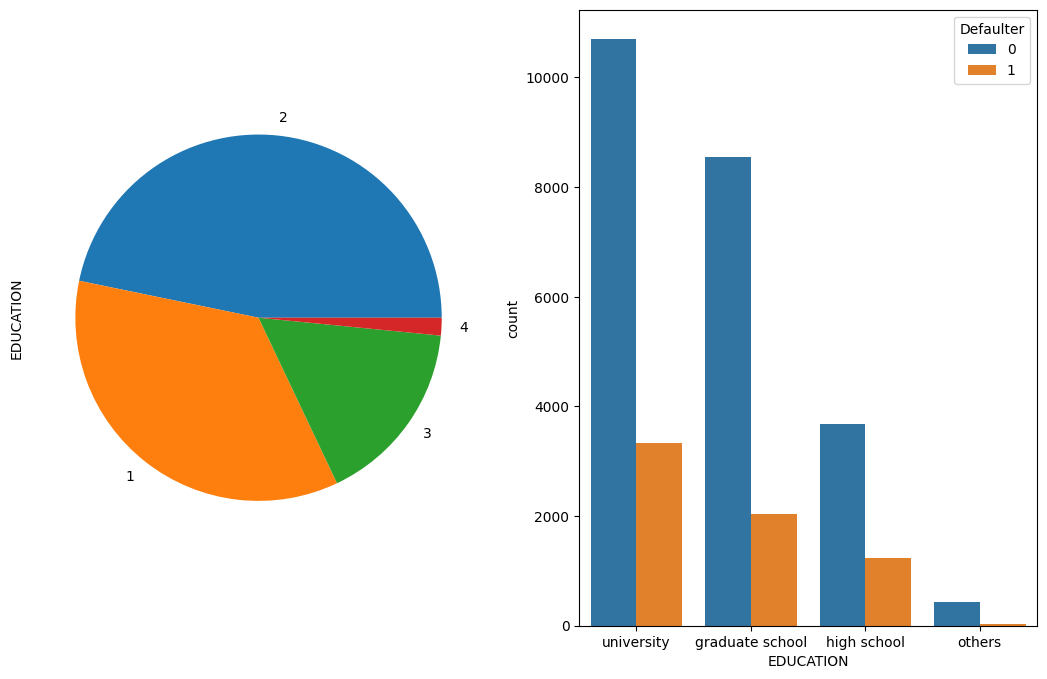

<Figure size 1000x500 with 0 Axes>

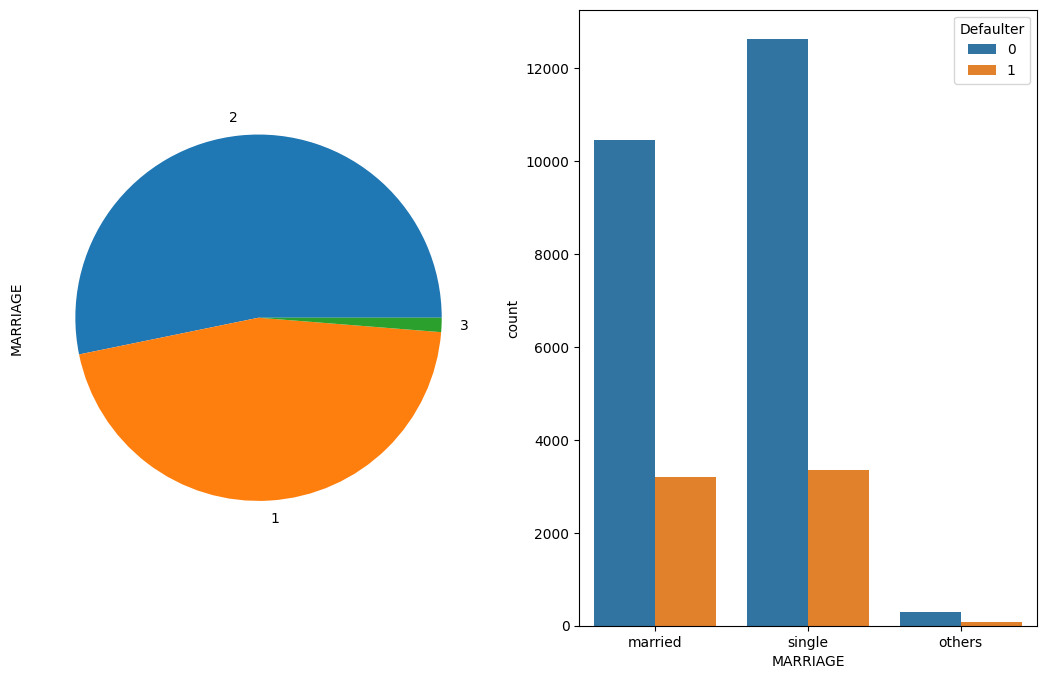

In [41]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

In [42]:
df.rename(columns={'PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_JUN                     30000 non-null  int64  
 7   PAY_MAY                     30000 non-null  int64  
 8   PAY_APR                     30000 non-null  int64  
 9   BILL_AMT_JUN                30000 non-null  float64
 10  BILL_AMT_MAY                30000 non-null  float64
 11  BILL_AMT_APR                30000 non-null  float64
 12  PAY_AMT_JUN                 30000 non-null  float64
 13  PAY_AMT_MAY                 300

In [44]:
df['AGE']=df['AGE'].astype('int')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_JUN                     30000 non-null  int64  
 7   PAY_MAY                     30000 non-null  int64  
 8   PAY_APR                     30000 non-null  int64  
 9   BILL_AMT_JUN                30000 non-null  float64
 10  BILL_AMT_MAY                30000 non-null  float64
 11  BILL_AMT_APR                30000 non-null  float64
 12  PAY_AMT_JUN                 30000 non-null  float64
 13  PAY_AMT_MAY                 300